In [46]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
data = pd.read_csv("../../Model/cleaned_dataset.csv")
backup_data = pd.read_csv("../../Model/cleaned_dataset.csv")

In [47]:
data.drop(columns=['Posting Month'])
X = data.drop(columns=['Price','Posting Month'])  
y = data['Price']

In [48]:
X.shape, y.shape

((5128, 11), (5128,))

In [49]:
categorical_columns = ['Manufacturer', 'Model', 'Transmission', 'Fuel', 'country_of_origin']
numerical_columns = ['Horse Power', 'Mileage', 'Posting Year', 'Age', 'price_per_km', 'price_per_horsepower']

In [50]:
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_columns),  # Encode categorical features
    ],
    remainder='passthrough'  # Pass numerical features as-is
)

In [51]:
X_encoded = ct.fit_transform(X)

In [52]:
encoded_feature_names = (
    ct.named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist()
    + numerical_columns
)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 0)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4102, 805), (1026, 805), (4102,), (1026,))

----------------------------------MODEL--------------------------------------------

In [55]:
final_dataset=pd.get_dummies(data,drop_first=True)


In [56]:
final_dataset.head()


,Price,Horse Power,Mileage,Posting Year,Age,price_per_km,price_per_horsepower,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BAIC,...,country_of_origin_Italy,country_of_origin_Japan,country_of_origin_Romania,country_of_origin_Russia,country_of_origin_South Korea,country_of_origin_Spain,country_of_origin_Sweden,country_of_origin_Tunisia,country_of_origin_United Kingdom,country_of_origin_United States
0,75000.0,20.0,143000.0,2023,15,0.524476,3750.000000,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,69000.0,11.0,87000.0,2023,8,0.793103,6272.727273,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,62000.0,13.0,190000.0,2023,13,0.326316,4769.230769,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,69000.0,7.0,59000.0,2023,4,1.169492,9857.142857,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,29000.0,4.0,125000.0,2023,10,0.232000,7250.000000,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [57]:
final_dataset.corr()


,Price,Horse Power,Mileage,Posting Year,Age,price_per_km,price_per_horsepower,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BAIC,...,country_of_origin_Italy,country_of_origin_Japan,country_of_origin_Romania,country_of_origin_Russia,country_of_origin_South Korea,country_of_origin_Spain,country_of_origin_Sweden,country_of_origin_Tunisia,country_of_origin_United Kingdom,country_of_origin_United States
Price,1.000000,0.502346,-0.404175,0.470554,-0.409309,0.315742,0.789349,-0.014998,0.082095,-0.005992,...,-0.128085,-0.002484,-0.049072,-0.005067,0.017702,0.016670,-0.003367,-0.003724,0.300723,-0.080288
Horse Power,0.502346,1.000000,0.001875,0.269488,0.044698,0.098747,0.058865,0.004959,0.082624,0.001917,...,-0.122923,0.053415,-0.036993,0.001565,-0.035039,-0.063493,0.018581,-0.010893,0.205935,-0.030144
Mileage,-0.404175,0.001875,1.000000,-0.277834,0.682189,-0.182725,-0.568190,0.009298,0.016049,-0.019460,...,0.063737,-0.024520,0.011060,-0.022775,-0.174254,-0.076801,0.004711,-0.020011,-0.107582,0.032036
Posting Year,0.470554,0.269488,-0.277834,1.000000,-0.276074,0.135426,0.432367,0.015570,0.035732,0.036388,...,-0.077055,0.003075,-0.017856,0.010637,0.015439,0.025606,0.010790,0.021005,0.164153,-0.034745
Age,-0.409309,0.044698,0.682189,-0.276074,1.000000,-0.135322,-0.617695,0.018415,0.004965,-0.016799,...,0.072103,-0.023383,-0.058401,-0.015151,-0.203290,-0.107265,0.007377,-0.009697,-0.072604,0.027946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
country_of_origin_Spain,0.016670,-0.063493,-0.076801,0.025606,-0.107265,-0.002990,0.099430,-0.011481,-0.034893,-0.004439,...,-0.044425,-0.054444,-0.023243,-0.003624,-0.062945,1.000000,-0.005732,-0.002562,-0.032175,-0.046299
country_of_origin_Sweden,-0.003367,0.018581,0.004711,0.010790,0.007377,-0.003047,-0.015146,-0.001955,-0.005941,-0.000756,...,-0.007564,-0.009270,-0.003958,-0.000617,-0.010718,-0.005732,1.000000,-0.000436,-0.005479,-0.007884
country_of_origin_Tunisia,-0.003724,-0.010893,-0.020011,0.021005,-0.009697,-0.000204,0.006152,-0.000874,-0.002656,-0.000338,...,-0.003382,-0.004144,-0.001769,-0.000276,-0.004791,-0.002562,-0.000436,1.000000,-0.002449,-0.003524
country_of_origin_United Kingdom,0.300723,0.205935,-0.107582,0.164153,-0.072604,0.075340,0.190171,-0.010973,-0.033352,-0.004243,...,-0.042463,-0.052038,-0.022216,-0.003464,-0.060164,-0.032175,-0.005479,-0.002449,1.000000,-0.044254


In [58]:
y=final_dataset['Price']
y.head()

0    75000.0
1    69000.0
2    62000.0
3    69000.0
4    29000.0
Name: Price, dtype: float64

In [59]:
X=final_dataset.drop(['Price'],axis=1)
X.head()

,Horse Power,Mileage,Posting Year,Age,price_per_km,price_per_horsepower,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BAIC,Manufacturer_BMW,...,country_of_origin_Italy,country_of_origin_Japan,country_of_origin_Romania,country_of_origin_Russia,country_of_origin_South Korea,country_of_origin_Spain,country_of_origin_Sweden,country_of_origin_Tunisia,country_of_origin_United Kingdom,country_of_origin_United States
0,20.0,143000.0,2023,15,0.524476,3750.000000,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,11.0,87000.0,2023,8,0.793103,6272.727273,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,13.0,190000.0,2023,13,0.326316,4769.230769,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,7.0,59000.0,2023,4,1.169492,9857.142857,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4.0,125000.0,2023,10,0.232000,7250.000000,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


Finding out the labels that has a much greater impact on the model.

In [60]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [61]:
print(model.feature_importances_)

[1.36030604e-01 1.97919216e-02 6.27715097e-02 2.79392385e-02
 3.70622565e-02 3.21280821e-01 5.26408530e-06 3.79275542e-04
 7.44587696e-07 3.33839696e-04 6.53116774e-08 4.52645596e-05
 1.91195930e-05 5.41695492e-09 5.78762149e-05 5.74436536e-05
 5.08623153e-05 1.48665228e-06 5.53392997e-06 9.59872456e-06
 9.72027942e-05 1.81885645e-05 4.88369969e-07 2.61848225e-06
 4.72617171e-06 3.39505124e-05 9.81316955e-06 2.81868777e-05
 3.20865662e-06 1.32526346e-05 1.24540866e-03 1.92157844e-04
 1.24201327e-04 2.73657143e-08 1.01162164e-10 3.02756391e-02
 6.10603523e-07 2.11463071e-05 8.34455609e-04 8.87386722e-05
 2.87553533e-05 2.67115428e-05 3.35805113e-05 3.54604186e-05
 2.62778215e-02 1.81058465e-05 5.10801159e-05 9.02465058e-06
 6.15169621e-05 1.51602025e-05 1.82328096e-07 8.20997147e-04
 2.43052292e-04 1.84728818e-06 4.13370136e-08 6.64241195e-09
 8.11369625e-08 5.14328295e-08 1.07164456e-09 7.22882223e-08
 8.85884444e-08 5.98975420e-07 1.46423578e-06 4.54899156e-06
 4.04488635e-06 3.525569

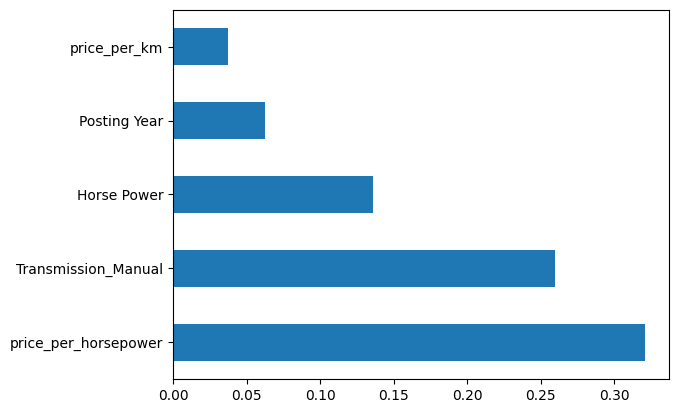

In [62]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [63]:
#scaler=StandardScaler()
#X=scaler.fit_transform(X)

In [64]:
X

,Horse Power,Mileage,Posting Year,Age,price_per_km,price_per_horsepower,Manufacturer_ALFA ROMEO,Manufacturer_AUDI,Manufacturer_BAIC,Manufacturer_BMW,...,country_of_origin_Italy,country_of_origin_Japan,country_of_origin_Romania,country_of_origin_Russia,country_of_origin_South Korea,country_of_origin_Spain,country_of_origin_Sweden,country_of_origin_Tunisia,country_of_origin_United Kingdom,country_of_origin_United States
0,20.0,143000.0,2023,15,0.524476,3750.000000,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,11.0,87000.0,2023,8,0.793103,6272.727273,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,13.0,190000.0,2023,13,0.326316,4769.230769,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,7.0,59000.0,2023,4,1.169492,9857.142857,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4.0,125000.0,2023,10,0.232000,7250.000000,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5123,9.0,7000.0,2024,1,35.714286,27777.777778,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5124,8.0,25000.0,2024,3,7.000000,21875.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5125,7.0,93000.0,2024,10,0.838710,11142.857143,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5126,6.0,184600.0,2024,9,0.368364,11333.333333,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [66]:
random_forest_regressor=RandomForestRegressor()
random_forest_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [67]:
train_acc=random_forest_regressor.score(X_train,y_train)
test_acc=random_forest_regressor.score(X_test,y_test)
print('Training Accuracy: ',round(train_acc*100, 2),'%')
print('Testing Accuracy: ',round(test_acc*100, 2),'%')

Training Accuracy:  99.64 %
Testing Accuracy:  98.81 %


In [68]:
predictions=random_forest_regressor.predict(X_test)
predictions

array([48693.  , 32407.88, 41546.  , ..., 37854.8 , 53990.  , 87918.  ])

In [69]:
predictions=random_forest_regressor.predict(X_test)

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


mae_new = mean_absolute_error(y_test, predictions)
mse_new = mean_squared_error(y_test, predictions)
r2_new = r2_score(y_test, predictions)

print(f"MAE après suppression: {mae_new}")
print(f"MSE après suppression: {mse_new}")
print(f"R² après suppression: {r2_new}")

MAE après suppression: 1070.3022417153995
MSE après suppression: 24936604.647034116
R² après suppression: 0.9881159879347051


C:\Users\Msi Rtx\AppData\Local\Temp\ipykernel_872\2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='Price', ylabel='Density'>

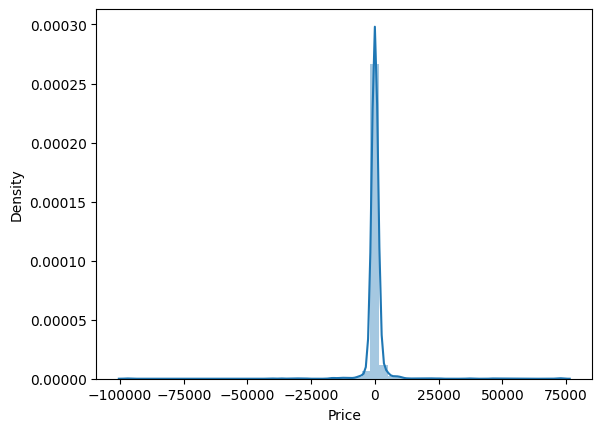

In [71]:
sns.distplot(y_test-predictions)

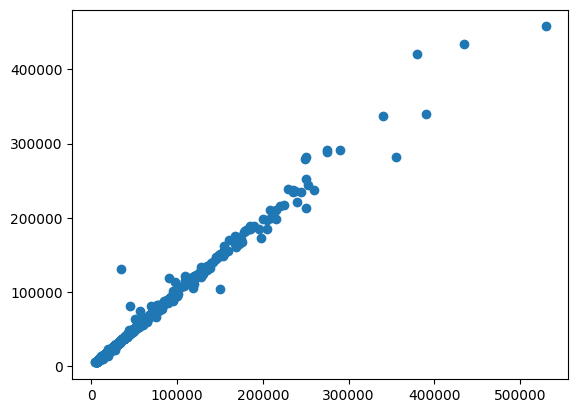

In [72]:
plt.scatter(y_test,predictions)